## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


In [145]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
sns.set_style('whitegrid')

In [146]:
df_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [147]:
df_tmbd = pd.read_csv("zippedData/tmdb.movies.csv.gz", compression='gzip')
df_tmbd.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [148]:
df_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz", compression='gzip')
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [149]:
#df_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", compression='gzip', sep = '\t', encoding='windows-1252')
#df_reviews.head(100)


In [150]:
df_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", compression='gzip', sep = '\t', encoding='windows-1252')
df_info.dropna(inplace=True)
#turning box office into an Int
df_info['box_office'] = df_info['box_office'].map(lambda x: x.lstrip('$'))
df_info['box_office'] = df_info['box_office'].map(lambda x: x.replace(',', ''))
df_info['box_office'] = df_info['box_office'].map(lambda x: int(x))
df_info.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics


In [151]:
df_info['rating'].value_counts()

R        105
PG-13     77
PG        38
NR         9
G          5
NC17       1
Name: rating, dtype: int64

In [152]:
sample_df = df_info[df_info['rating'] == "PG-13"]
sample_df.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224,127 minutes,Universal Pictures
61,77,"Until he was downsized, affable, amiable Larry...",PG-13,Comedy|Drama,Tom Hanks,Tom Hanks|Nia Vardalos,"Jul 1, 2011","Nov 15, 2011",$,35565975,99 minutes,Universal Pictures


In [153]:
Population_mean = df_info["box_office"].mean()
Population_std = df_info["box_office"].std()
Sample_mean = sample_df["box_office"].mean()
Sample_count = sample_df["box_office"].count()
#Alpha is .05 = 1.96

print("Population Mean: " + str(Population_mean))
print("Population Standard Deviation: " + str(Population_std))
print("Sample Mean: " + str(Sample_mean))
print("Sample Count: " + str(Sample_count))

Population Mean: 41958400.02127659
Population Standard Deviation: 62630155.518367976
Sample Mean: 68723585.81818181
Sample Count: 77


In [154]:
#df_info["box_office"].describe()
z = (Sample_mean - Population_mean) / (Population_std / (Sample_count ** .5))
#We can reject the Null hypothesis
#Since 3.75 > 1.96, we can say with a 95% level of confidence that a pg-13 rating significantly affects 
#The box office value  
z

3.7500074883399694

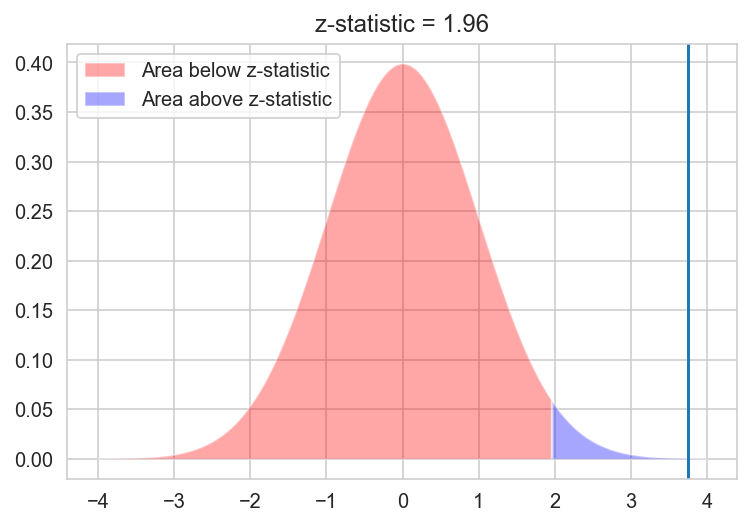

In [158]:
plt.fill_between(x=np.arange(-4,1.96,0.01),
                 y1= stats.norm.pdf(np.arange(-4,1.96,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(1.96,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1.96,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-statistic')
plt.axvline(x=3.75)
plt.legend()
plt.title ('z-statistic = 1.96');

In [81]:
df_budgets['production_budget'] = df_budgets['production_budget'].map(lambda x: x.lstrip('$'))
df_budgets['production_budget'] = df_budgets['production_budget'].map(lambda x: x.replace(',', ''))
df_budgets['production_budget'] = df_budgets['production_budget'].map(lambda x: int(x))

df_budgets['domestic_gross'] = df_budgets['domestic_gross'].map(lambda x: x.lstrip('$'))
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].map(lambda x: x.replace(',', ''))
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].map(lambda x: int(x))

df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].map(lambda x: x.lstrip('$'))
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].map(lambda x: x.replace(',', ''))
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].map(lambda x: int(x))

In [82]:
df_budgets['domestic_revenue'] = df_budgets.apply(lambda x:  x["domestic_gross"] - x["production_budget"], axis=1)
df_budgets['global_revenue'] = df_budgets.apply(lambda x:  x["worldwide_gross"], axis=1)


df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_revenue,global_revenue
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,1316721747
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495,42482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,0


In [98]:
df = df_budgets
df.rename(columns = {'movie':'title'}, inplace = True)
df = pd.merge(df_budgets, tmdb, on = 'title')
df

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,domestic_revenue,global_revenue
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,1316721747
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495,42482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,0


In [11]:
correlation_matrix = df_budgets.corr()
correlation_matrix
#Singificant correlation between budget and gross in general
#Budget seems to have a bigger effect on world wide in comparison to countrywide
#SUPER strong correlation between worldwide and domestic. As in a domestic release can predict a worldwide release
prod_domest = 0.685682
prod_world =  0.748306
domest_world = 0.938853

In [12]:
df_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [13]:
production_budget_df = list(df_budgets['production_budget'])
domestic_gross_df = list(df_budgets['domestic_gross'])
worldwide_gross_df = list(df_budgets['worldwide_gross'])

In [14]:
production_budget_var = np.var(production_budget_df)
domestic_gross_var = np.var(domestic_gross_df)
worldwide_gross_var = np.var(worldwide_gross_df)

In [15]:
print("Production Budget Var: "  + str(production_budget_var))
print("Domestic Gross Var: "  + str(domestic_gross_var))
print("Wordlwide Gross Var: "  + str(worldwide_gross_var))

Production Budget Var: 1747947407847397.0
Domestic Gross Var: 4655973735180275.0
Wordlwide Gross Var: 3.052178781741206e+16


Correlation Coefficient:


0.685682

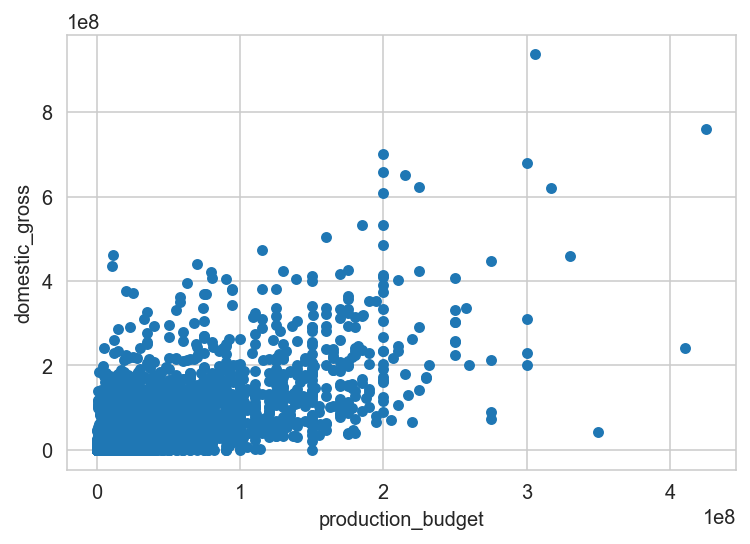

In [16]:
df_budgets.plot.scatter(x = 'production_budget', y = 'domestic_gross', s = 20);
print("Correlation Coefficient:")
prod_domest

Correlation Coefficient:


0.748306

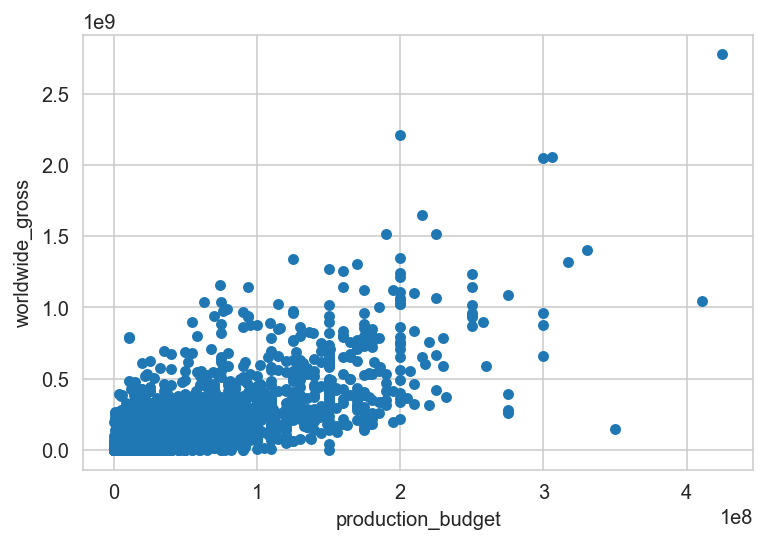

In [19]:
df_budgets.plot.scatter(x = 'production_budget', y = 'worldwide_gross', s = 20);
print("Correlation Coefficient:")
prod_world


Correlation Coeficien


0.938853

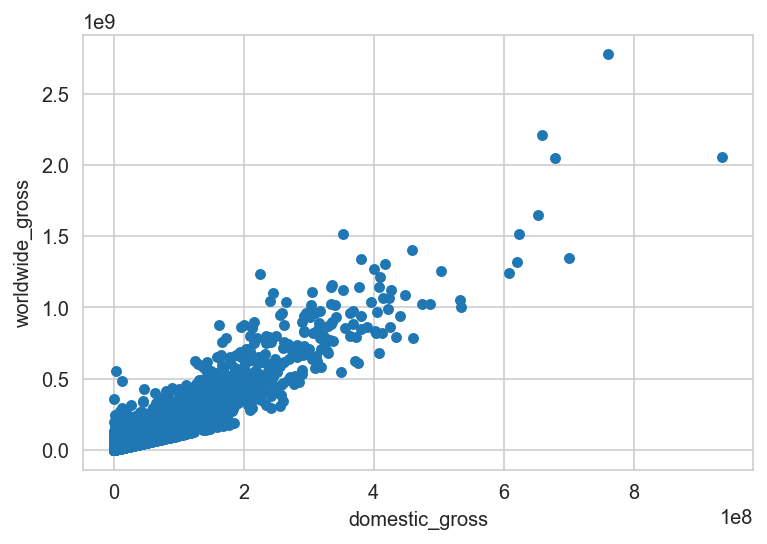

In [18]:
df_budgets.plot.scatter(x = 'domestic_gross', y = 'worldwide_gross', s = 20);
print("Correlation Coeficien")
domest_world